#  Vasiliki Kostara, Chapter 3: Forest Fires, Homework 1

# 3.1

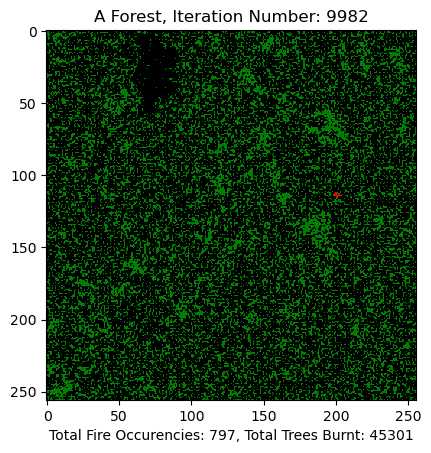

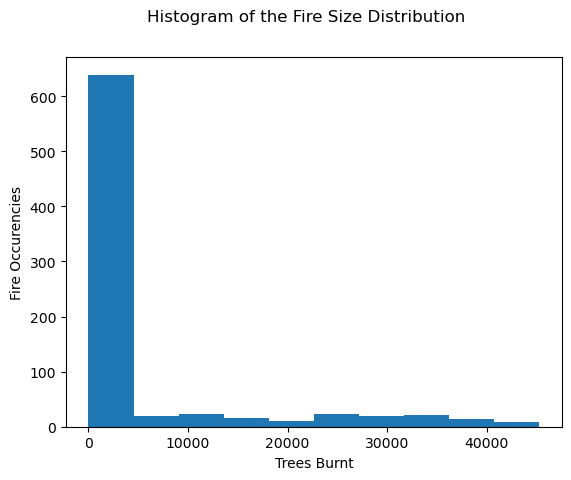

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import clear_output

forest_size = 256
forest = np.zeros((forest_size, forest_size), dtype="uint8")
empty = 0
tree = 1
burnt = 2
fire = 3
nIterations = 10000
tree_growth_parameter = 0.01
lightning_strike_probability = 0.2
fire_count = 0 # number of fires happening
max_size_of_fire = 0 # number of trees burnt in a fire. This is appended to the list size of fire
size_of_fire = []
neighbourhood = [[1,0], [0,1], [-1,0], [0,-1]]

def plot_forest(forest, i, fire_count, max_size_of_fire):
    colors = ['Black', 'Green', 'Red','Orange']
    clear_output(wait=True)
    start = (int)(np.amin(forest))
    end = (int)(np.max(forest))
    colormap = ListedColormap(colors[start:end+1])
    plt.imshow(forest, colormap) 
    plt.title('A Forest, Iteration Number: '+ str(i))
    plt.xlabel('Total Fire Occurencies: '+str(fire_count)+', Total Trees Burnt: '+str(max_size_of_fire))
    plt.show() 
    plt.clf()
    
for i in range(nIterations+1): 
    forest[(np.random.rand(forest_size, forest_size) < tree_growth_parameter ) & (forest == empty)] = tree
        
    if (np.random.random() < lightning_strike_probability):
        lightning_strike_location = (np.random.random(2)*forest_size).astype(int)
        x_lightning = lightning_strike_location[0]
        y_lightning = lightning_strike_location[1]

        if forest[y_lightning, x_lightning] == tree:
            forest[y_lightning, x_lightning] = fire
            fire_count = fire_count + 1

            while sum(sum(forest == fire)) > 0:    
                for y_fire, x_fire in zip(*np.where(forest == fire)):
                    for dx, dy in neighbourhood:
                        x = (x_fire+dx)%forest_size
                        y = (y_fire+dy)%forest_size
                        if forest[y, x] == tree:
                            forest[y, x] = fire

                    forest[y_fire, x_fire] = burnt
            if sum(sum(forest == burnt)) > max_size_of_fire:
                max_size_of_fire = sum(sum(forest == burnt))
            size_of_fire.append(sum(sum(forest == burnt))) 
            plot_forest(forest,i, fire_count, max_size_of_fire)
            forest[forest == burnt] = empty

    
plt.hist(size_of_fire, bins = 10)
plt.xlabel('Trees Burnt')
plt.ylabel('Fire Occurencies')
plt.suptitle('Histogram of the Fire Size Distribution')
plt.show()

# 3.3

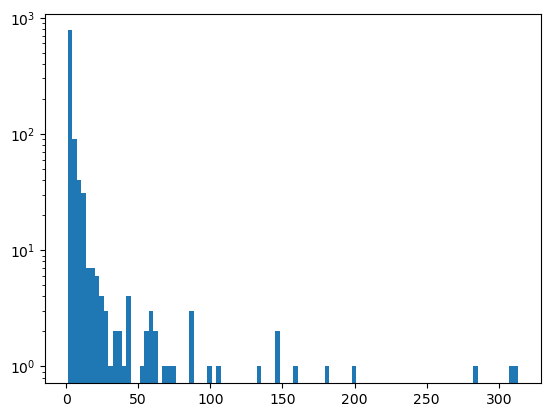

In [12]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 2
exponent = 1 / (1 - alpha)       
sequence_min = 1
sequence_length = 1000
sequence = np.zeros(sequence_length)

for i in range(sequence_length):
    sequence[i] = sequence_min * (np.random.random() ** exponent)

plt.hist(sequence, bins=100)
plt.yscale("log")
plt.show()

# 3.4

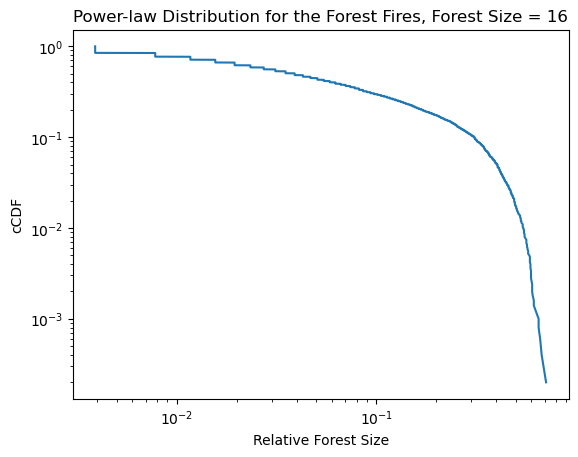

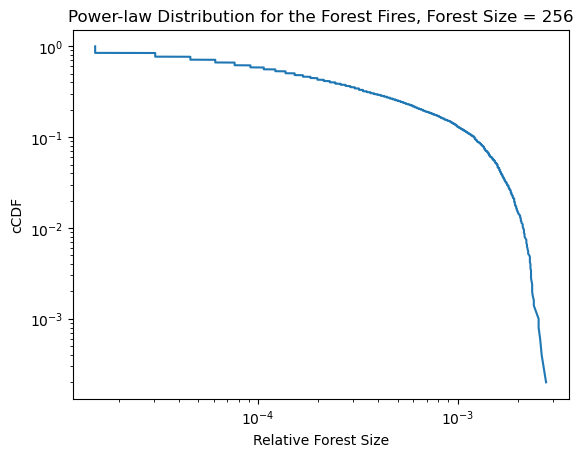

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import clear_output

forest_size = 16
forest = np.zeros((forest_size, forest_size), dtype="uint8")
empty = 0
tree = 1
burnt = 2
fire = 3
fire_events = 5000
tree_growth_parameter = 0.01
lightning_strike_probability = 0.2
fire_count = 0 # number of fires happening
max_size_of_fire = 0 # number of trees burnt in a fire. This is appended to the list size of fire
size_of_fire = []
neighbourhood = [[1,0], [0,1], [-1,0], [0,-1]]

def plot_forest(forest, i, fire_count, max_size_of_fire):
    colors = ['Black', 'Green', 'Red','Orange']
    clear_output(wait=True)
    start = (int)(np.amin(forest))
    end = (int)(np.max(forest))
    colormap = ListedColormap(colors[start:end+1])
    plt.imshow(forest, colormap) 
    plt.title('No. of Iterations: '+ str(i))
    plt.xlabel('No. of Fires: '+str(fire_count)+', Max No. of Trees Burnt in an Fire: '+str(max_size_of_fire))
    plt.show() 
    plt.clf()
    

while fire_count < fire_events:
    forest[(np.random.rand(forest_size, forest_size) < tree_growth_parameter ) & (forest == empty)] = tree
        
    if (np.random.random() < lightning_strike_probability):
        lightning_strike_location = (np.random.random(2)*forest_size).astype(int)
        x_lightning = lightning_strike_location[0]
        y_lightning = lightning_strike_location[1]

        if forest[y_lightning, x_lightning] == tree:
            forest[y_lightning, x_lightning] = fire
            fire_count = fire_count + 1

            while sum(sum(forest == fire)) > 0:    
                for y_fire, x_fire in zip(*np.where(forest == fire)):
                    for dx, dy in neighbourhood:
                        x = (x_fire+dx)%forest_size
                        y = (y_fire+dy)%forest_size
                        if forest[y, x] == tree:
                            forest[y, x] = fire

                    forest[y_fire, x_fire] = burnt
            if sum(sum(forest == burnt)) > max_size_of_fire:
                max_size_of_fire = sum(sum(forest == burnt))
            size_of_fire.append(sum(sum(forest == burnt))) 
            # plot_forest(forest,i, fire_count, max_size_of_fire)
            forest[forest == burnt] = empty

sorted_fire_size = np.sort(size_of_fire)/(forest_size**2)
cCDF = []

for j in range(fire_count):
    cCDF_j = (fire_count - j)/fire_count
    cCDF.append(cCDF_j)

plt.loglog(sorted_fire_size, cCDF)

plt.xlabel('Relative Forest Size')
plt.ylabel('cCDF')
plt.title('Power-law Distribution for the Forest Fires, Forest Size = 16')
plt.show()

# for large forest size
forest_size = 256
forest = np.zeros((forest_size, forest_size), dtype="uint8")

while fire_count < fire_events:
    forest[(np.random.rand(forest_size, forest_size) < tree_growth_parameter ) & (forest == empty)] = tree
        
    if (np.random.random() < lightning_strike_probability):
        lightning_strike_location = (np.random.random(2)*forest_size).astype(int)
        x_lightning = lightning_strike_location[0]
        y_lightning = lightning_strike_location[1]

        if forest[y_lightning, x_lightning] == tree:
            forest[y_lightning, x_lightning] = fire
            fire_count = fire_count + 1

            while sum(sum(forest == fire)) > 0:    
                for y_fire, x_fire in zip(*np.where(forest == fire)):
                    for dx, dy in neighbourhood:
                        x = (x_fire+dx)%forest_size
                        y = (y_fire+dy)%forest_size
                        if forest[y, x] == tree:
                            forest[y, x] = fire

                    forest[y_fire, x_fire] = burnt
            if sum(sum(forest == burnt)) > max_size_of_fire:
                max_size_of_fire = sum(sum(forest == burnt))
            size_of_fire.append(sum(sum(forest == burnt))) 
            # plot_forest(forest,i, fire_count, max_size_of_fire)
            forest[forest == burnt] = empty

sorted_fire_size = np.sort(size_of_fire)/(forest_size**2)
cCDF = []

for j in range(fire_count):
    cCDF_j = (fire_count - j)/fire_count
    cCDF.append(cCDF_j)

plt.loglog(sorted_fire_size, cCDF)

plt.xlabel('Relative Forest Size')
plt.ylabel('cCDF')
plt.title('Power-law Distribution for the Forest Fires, Forest Size = 256')
plt.show()

# 3.5

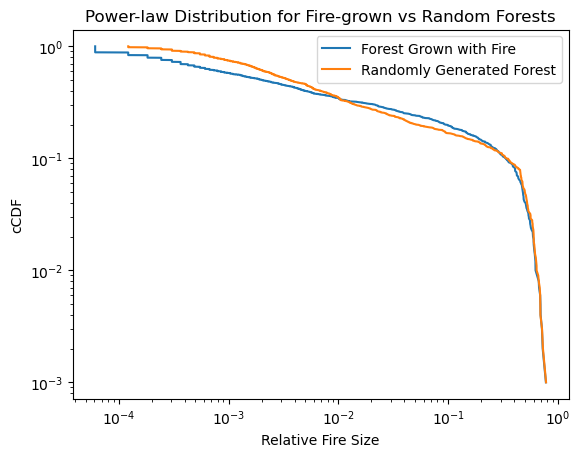

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap
from IPython.display import clear_output
from sklearn.utils import shuffle

forest_size = 128
forest = np.zeros((forest_size, forest_size), dtype="uint8")
empty = 0
tree = 1
burnt = 2
fire = 3
fire_events = 1000
tree_growth_parameter = 0.01
lightning_strike_probability =  0.2
fire_count = 0 # number of fires happening
max_size_of_fire = 0 # number of trees burnt in a fire. This is appended to the list size of fire
size_of_fire = []
random_size_of_fire = []
neighbourhood = [[1,0], [0,1], [-1,0], [0,-1]]

def plot_forest(forest, i, fire_count, max_size_of_fire):
    colors = ['Black', 'Green', 'Red','Orange']
    clear_output(wait=True)
    start = (int)(np.amin(forest))
    end = (int)(np.max(forest))
    colormap = ListedColormap(colors[start:end+1])
    plt.imshow(forest, colormap) 
    plt.title('No. of Iterations: '+ str(i))
    plt.xlabel('No. of Fires: '+str(fire_count)+', Max No. of Trees Burnt in an Fire: '+str(max_size_of_fire))
    plt.show() 
    plt.clf()
    
while fire_count < fire_events: 
    forest[(np.random.rand(forest_size, forest_size) < tree_growth_parameter ) & (forest == empty)] = tree
        
    if (np.random.random() < lightning_strike_probability):
        lightning_strike_location = (np.random.random(2)*forest_size).astype(int)
        x_lightning = lightning_strike_location[0]
        y_lightning = lightning_strike_location[1]

        if forest[y_lightning, x_lightning] == tree:
            forest[y_lightning, x_lightning] = fire
            fire_count = fire_count + 1
            random_forest = shuffle(forest.copy())

            while np.sum(forest == fire):    
                for y_fire, x_fire in zip(*np.where(forest == fire)):
                    for dx, dy in neighbourhood:
                        x = (x_fire+dx)%forest_size
                        y = (y_fire+dy)%forest_size
                        if forest[y, x] == tree:
                            forest[y, x] = fire

                    forest[y_fire, x_fire] = burnt
                    
            count_burnt = np.sum(forest == burnt)
            if count_burnt > max_size_of_fire:
                max_size_of_fire = count_burnt
                
            size_of_fire.append(count_burnt)
            forest[forest == burnt] = empty
            
            trees_in_random_forest_list = list(zip(*np.where(random_forest == tree)))
            fire_in_random_forest = random.choice(trees_in_random_forest_list)
            lightning_strike_location = fire_in_random_forest            
            x_lightning = lightning_strike_location[0]
            y_lightning = lightning_strike_location[1]

            random_forest[y_lightning, x_lightning] = fire

            while sum(sum(random_forest == fire)) > 0:    
                for y_fire, x_fire in zip(*np.where(random_forest == fire)):
                    for dx, dy in neighbourhood:
                        x = (x_fire+dx)%forest_size
                        y = (y_fire+dy)%forest_size
                        
                        if random_forest[y, x] == tree:
                            random_forest[y, x] = fire

                    random_forest[y_fire, x_fire] = burnt
           
            random_size_of_fire.append(sum(sum(random_forest == burnt))) 
            random_forest[random_forest == burnt] = empty

sorted_fire_size = np.sort(size_of_fire)/(forest_size**2)
sorted_random_fire_size = np.sort(random_size_of_fire)/(forest_size**2)

cCDF = []

for j in range(fire_count):
    cCDF_j = (fire_count - j)/fire_count
    cCDF.append(cCDF_j)

plt.loglog(sorted_fire_size, cCDF)
plt.loglog(sorted_random_fire_size, cCDF)
plt.legend(['Forest Grown with Fire',"Randomly Generated Forest"])


plt.xlabel('Relative Fire Size')
plt.ylabel('cCDF')
#plt.suptitle('Histogram of Trees Burnt During Each Fire Event')
plt.title('Power-law Distribution for Fire-grown vs Random Forests')
plt.show()

In [15]:
!pip install nbconvert[webpdf]

     ---------------------------------------- 83.4/83.4 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 6.1 MB/s eta 0:00:00


In [16]:
!jupyter nbconvert --to webpdf --allow-chromium-download Forest_Fires.ipynb

[NbConvertApp] Converting notebook Forest_Fires.ipynb to webpdf
[NbConvertApp] Building PDF
[INFO] Starting Chromium download.

  0%|          | 0.00/137M [00:00<?, ?b/s]
  0%|          | 451k/137M [00:00<00:33, 4.10Mb/s]
  1%|1         | 1.44M/137M [00:00<00:19, 7.03Mb/s]
  2%|1         | 2.56M/137M [00:00<00:15, 8.48Mb/s]
  2%|2         | 3.41M/137M [00:00<00:21, 6.13Mb/s]
  3%|3         | 4.65M/137M [00:00<00:17, 7.67Mb/s]
  4%|4         | 5.50M/137M [00:00<00:19, 6.83Mb/s]
  5%|4         | 6.35M/137M [00:00<00:18, 7.09Mb/s]
  5%|5         | 7.11M/137M [00:01<00:21, 6.07Mb/s]
  6%|5         | 7.83M/137M [00:01<00:20, 6.22Mb/s]
  7%|6         | 9.05M/137M [00:01<00:16, 7.54Mb/s]
  7%|7         | 9.85M/137M [00:01<00:19, 6.67Mb/s]
  8%|7         | 10.9M/137M [00:01<00:17, 7.33Mb/s]
  9%|8         | 12.0M/137M [00:01<00:15, 8.18Mb/s]
 10%|9         | 13.3M/137M [00:01<00:13, 9.20Mb/s]
 11%|#         | 14.5M/137M [00:01<00:12, 9.62Mb/s]
 12%|#1        | 15.8M/137M [00:02<00:11, 10.4Mb/s